In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# load data
diabetes_data  = pd.read_csv(r"C:\Users\Anshu\Documents\my_projects_data\diabetes-classification\large_data_\diabetes.csv")
diabetes_data.head()
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [21]:
diabetes_data.shape

(2000, 9)

0    1316
1     684
Name: Outcome, dtype: int64


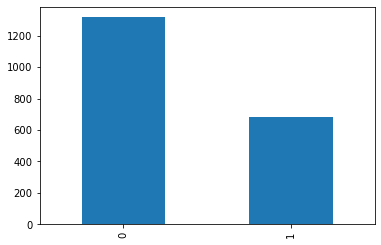

In [22]:
# Data visualization for number of people with diabetes and no diabetes
print(diabetes_data.Outcome.value_counts())
p = diabetes_data.Outcome.value_counts().plot(kind='bar')

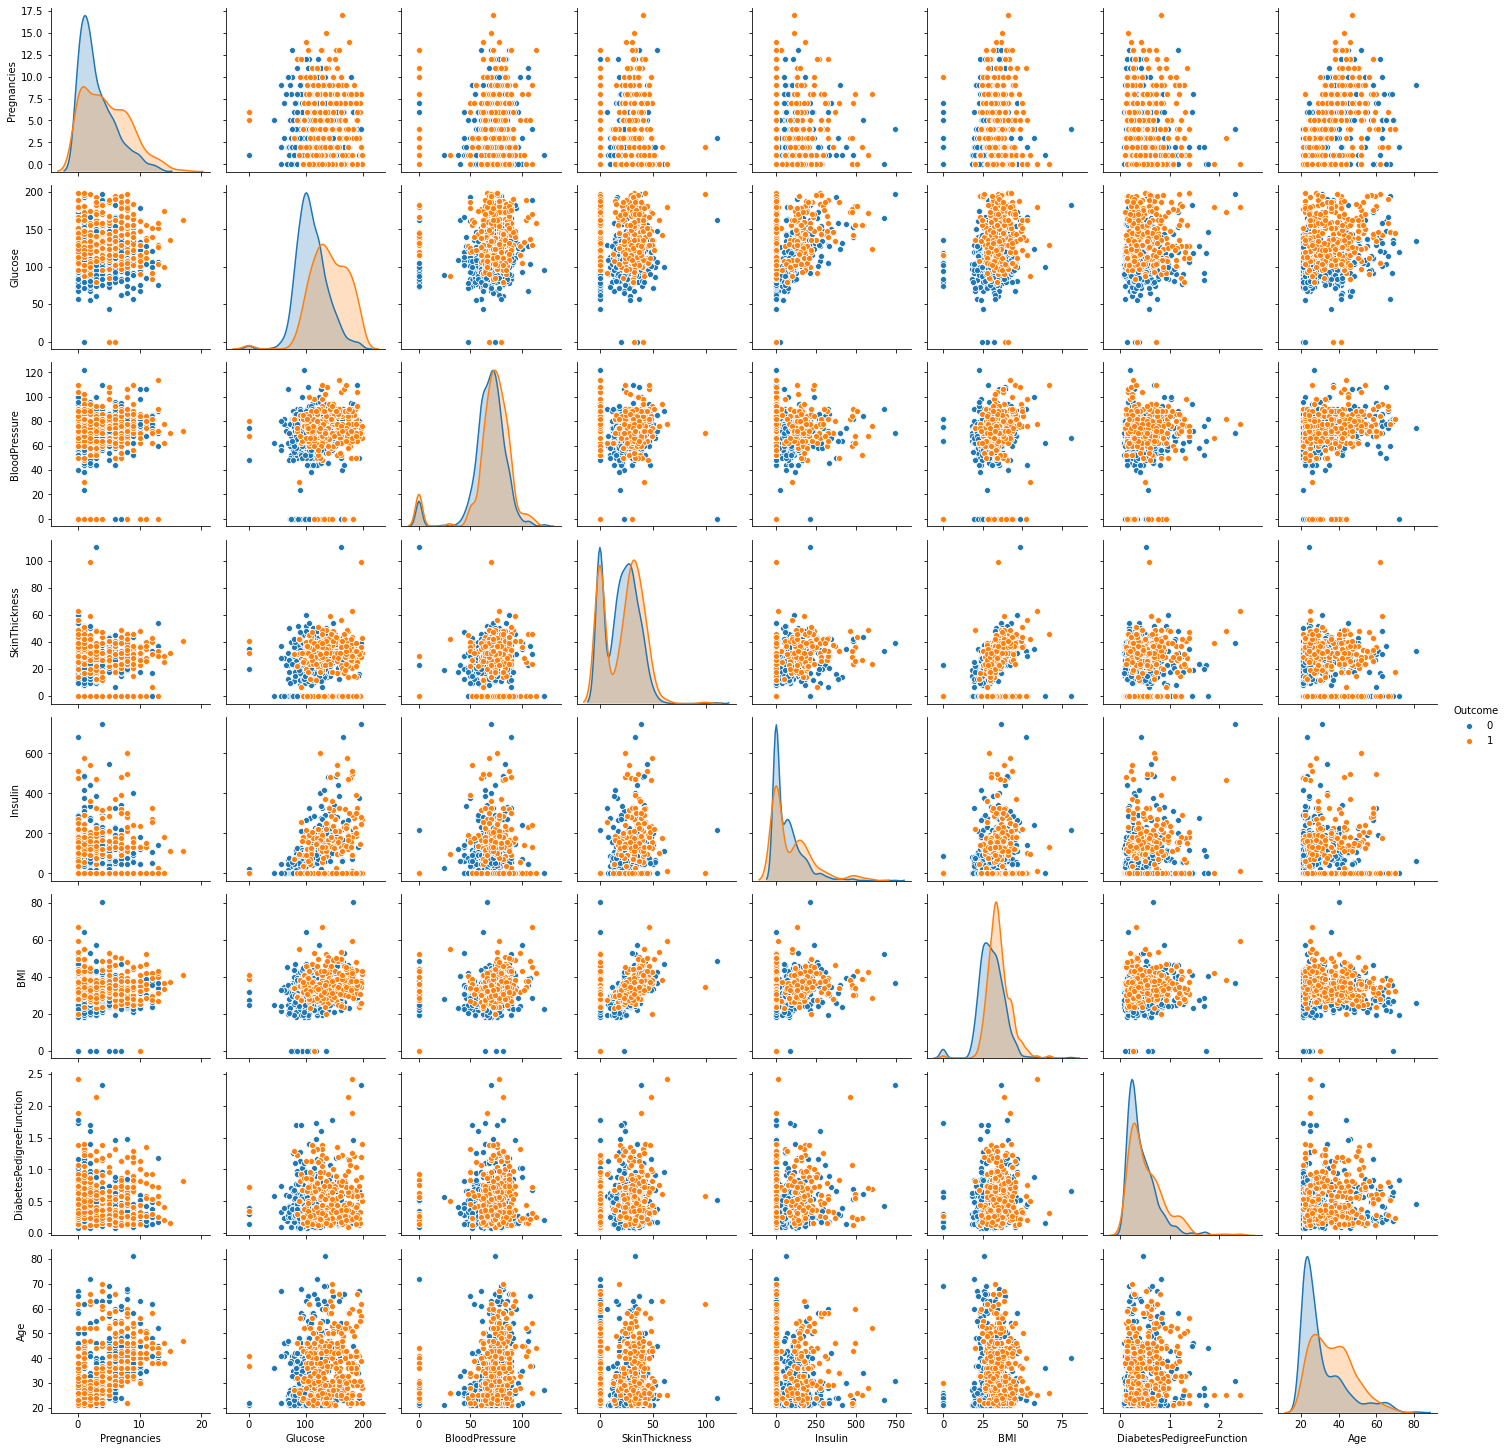

In [8]:
# draw pairplot for ‘outcome’ and other indicators
sns.pairplot(diabetes_data,hue="Outcome")
plt.show()

### We looked at the chart and found some anomalies 
### Some indicators like ‘BMI’，‘Insulin’ should not be zero 
### We should use ‘NaN’ fill to these zero

In [11]:
colume = ['Glucose','BloodPressure','SkinThickness','Insulin']
diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)

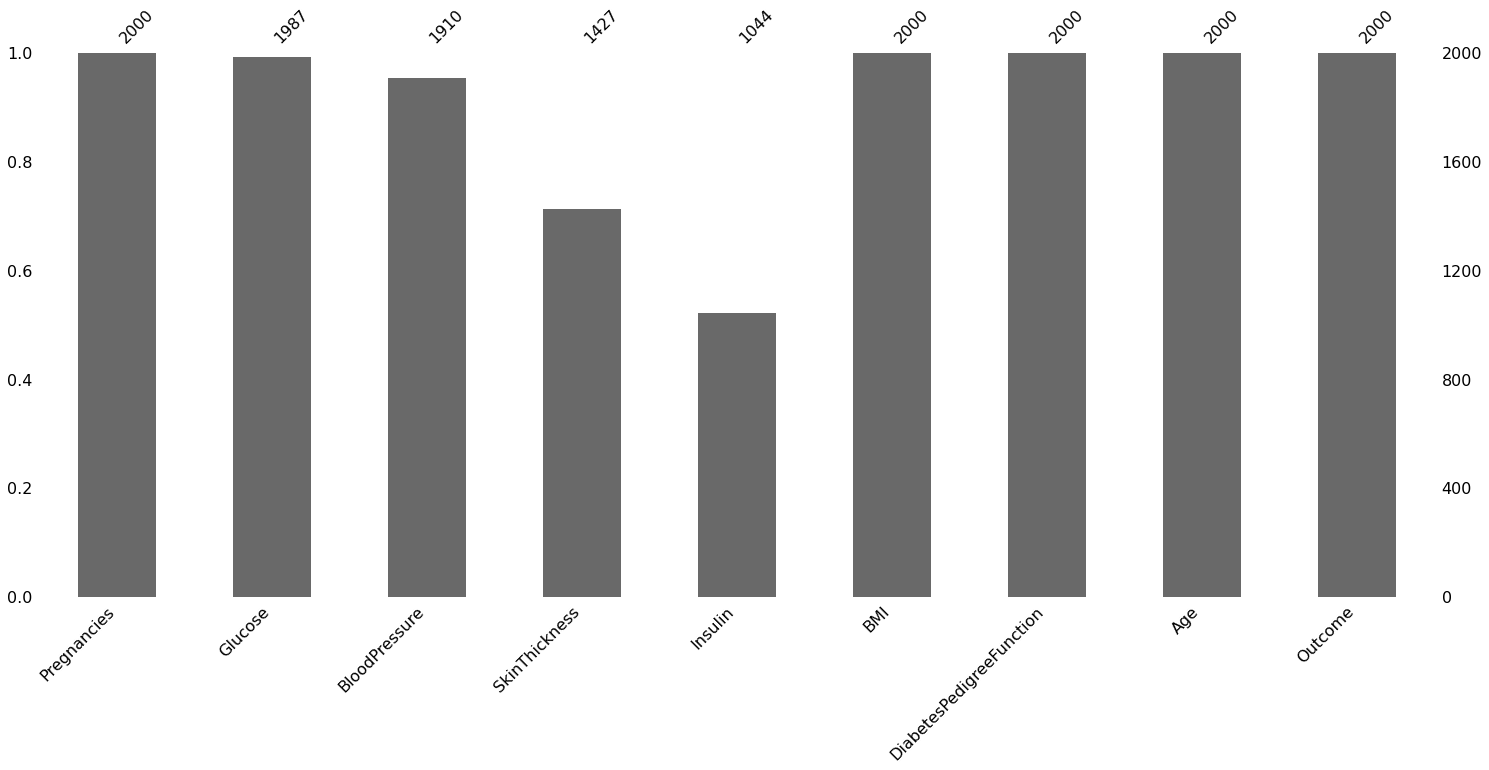

In [12]:
# use missingno function to find 'NaN'
import missingno as msno
msno.bar(diabetes_data)
plt.show()

### 'SkinThickness' and Insulin' are full of 'NaN'
### drop it

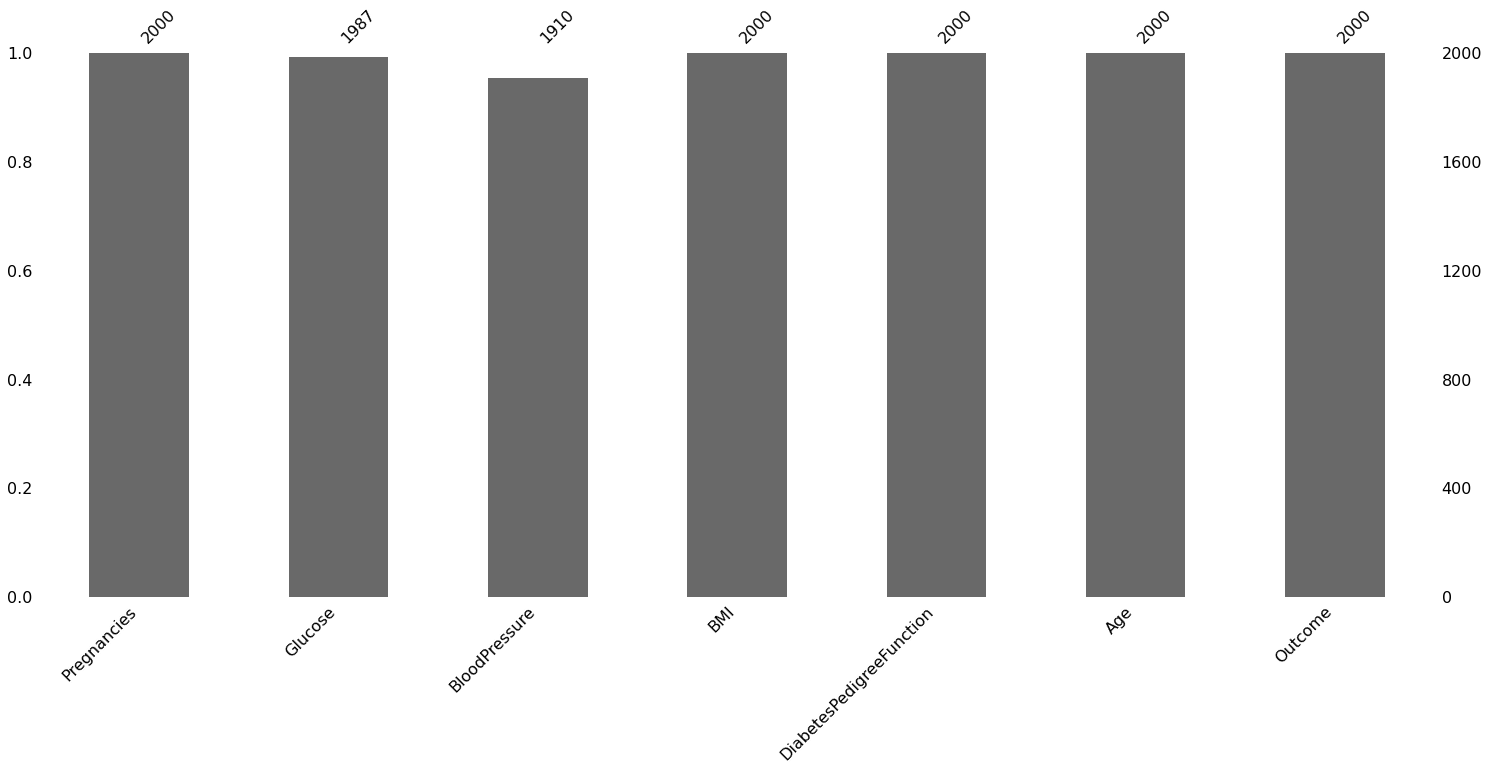

In [13]:
thresh_count = diabetes_data.shape[0]*0.8
diabetes_data = diabetes_data.dropna(thresh=thresh_count,axis=1)
msno.bar(diabetes_data)
plt.show()

### There are only a few NaN values in the list
### use sklearn SimpleImputer fill it

In [14]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer()
colume_2 = ['Glucose','BloodPressure']
diabetes_data[colume_2] = imr.fit_transform(diabetes_data[colume_2])
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,33.6,0.127,47,1
1,0,84.0,82.000000,38.2,0.233,23,0
2,0,145.0,72.403665,44.2,0.630,31,1
3,0,135.0,68.000000,42.3,0.365,24,1
4,1,139.0,62.000000,40.7,0.536,21,0


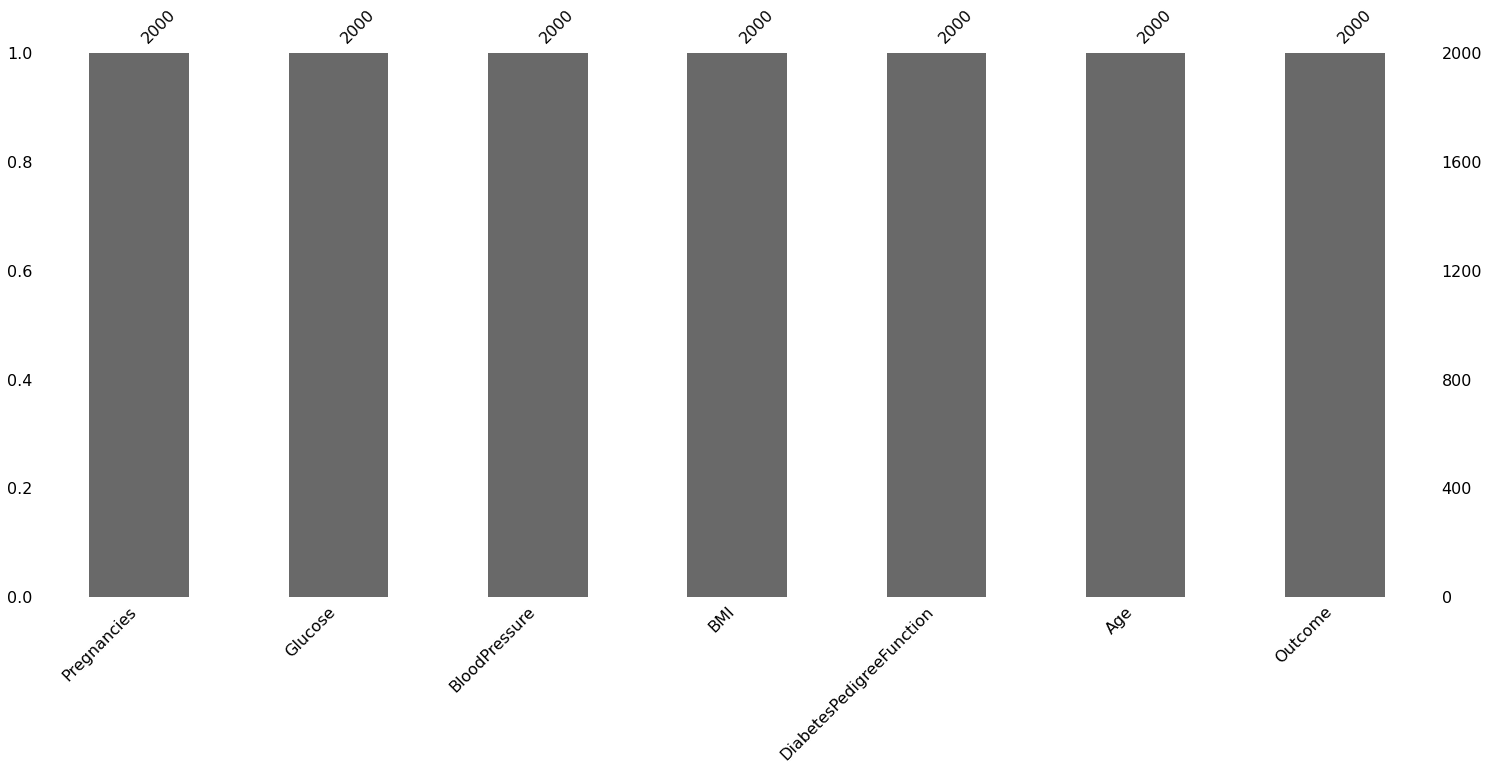

In [15]:
msno.bar(diabetes_data)
plt.show()

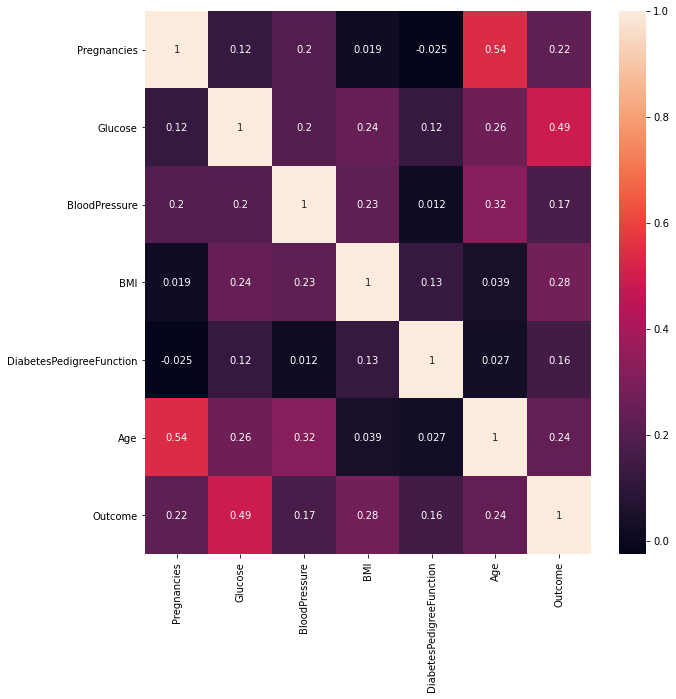

In [16]:
# check data coefficient
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_data.corr(),annot=True)
plt.show()

### Load bunch of sklearn models

In [17]:
x = diabetes_data.drop('Outcome',axis=1)
y = diabetes_data['Outcome']

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [21]:
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    RandomForestClassifier(max_depth=5,min_samples_split=3),
    AdaBoostClassifier(),
    ]

log = []
for clf in classifiers:
    clf.fit(x_train,y_train)
    name = clf.__class__.__name__
    print('='*30)
    print(name)
    print('****Result****')
    predictions = clf.predict(x_test)
    acc = accuracy_score(y_test,predictions)
    print('Accuracy:{:.4%}'.format(acc))
    log.append([name,acc*100])

print('='*30)

KNeighborsClassifier
****Result****
Accuracy:84.8333%
LogisticRegression
****Result****
Accuracy:79.1667%
RandomForestClassifier
****Result****
Accuracy:84.0000%
AdaBoostClassifier
****Result****
Accuracy:79.8333%


In [22]:
log = pd.DataFrame(log)
log.rename(columns = {0:'Classifier',1:'Accuracy'},inplace=True)
log

,Classifier,Accuracy
0,KNeighborsClassifier,84.833333
1,LogisticRegression,79.166667
2,RandomForestClassifier,84.000000
3,AdaBoostClassifier,79.833333


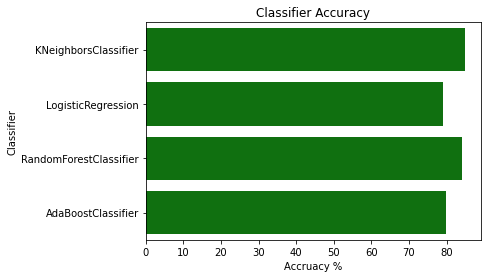

The best model is : Classifier    RandomForestClassifier
Accuracy                     84.8333
dtype: object


In [23]:
sns.barplot(x='Accuracy', y='Classifier',data=log,color='g')
plt.xlabel('Accruacy %')
plt.title('Classifier Accuracy')
plt.show()
print('The best model is :',log.max())

In [27]:
final_model =   KNeighborsClassifier(3)
final_model.fit(x_train,y_train)

pickle.dump(RFC,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))